In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_film = pd.read_csv("df_film.csv")

In [5]:
df_top_genre = pd.read_csv("df_top_genre.csv").set_index("genre")

In [16]:
df_top_pays = pd.read_csv("Top_pays.csv")

In [5]:
df_top10_real_note = pd.read_csv("top10_real_note.csv")

In [6]:
df_top10_real_note2 = pd.read_csv("top10_real_note2.csv")

## Répartition du nombre de film par décénie (@Julien)

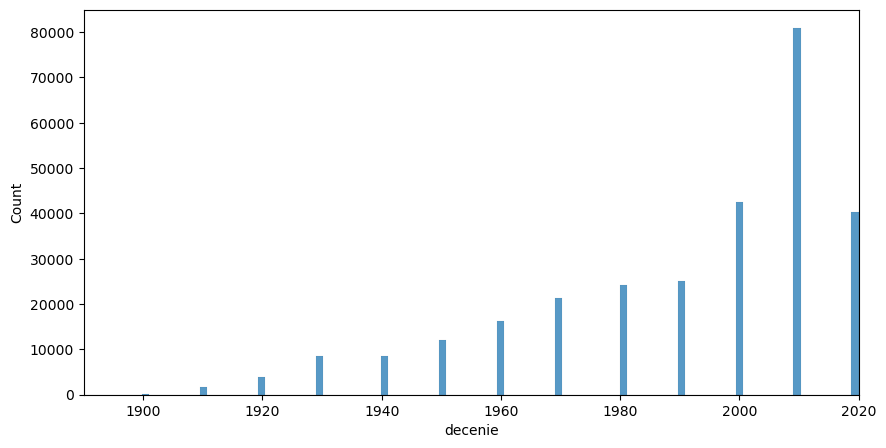

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_film, x="decenie")
plt.xlim(1890,2020)
plt.show()

On peut voir que depuis les années 2000 il y a une explosion du nombre de films. On pourrait donc proposer des films proportionnellement à leur apparition dans le dataframe.

## Popularité des films par décénie

C:\Users\Luna\AppData\Local\Temp\ipykernel_2040\519602333.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_film,


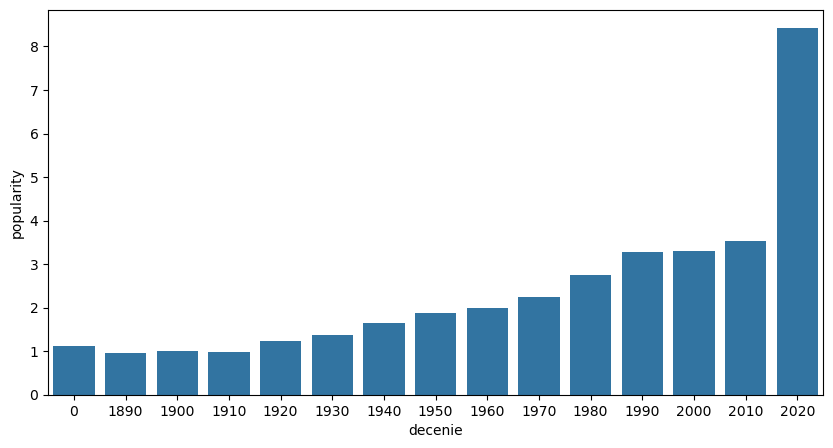

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_film, 
            x="decenie", 
            y="popularity",
            ci = None)
plt.show()

On peut voir une nette augmentation de la popularité des films en 2020 mais que faire de cette information finalement ? 

## Pays producteurs qui ont le meilleur score

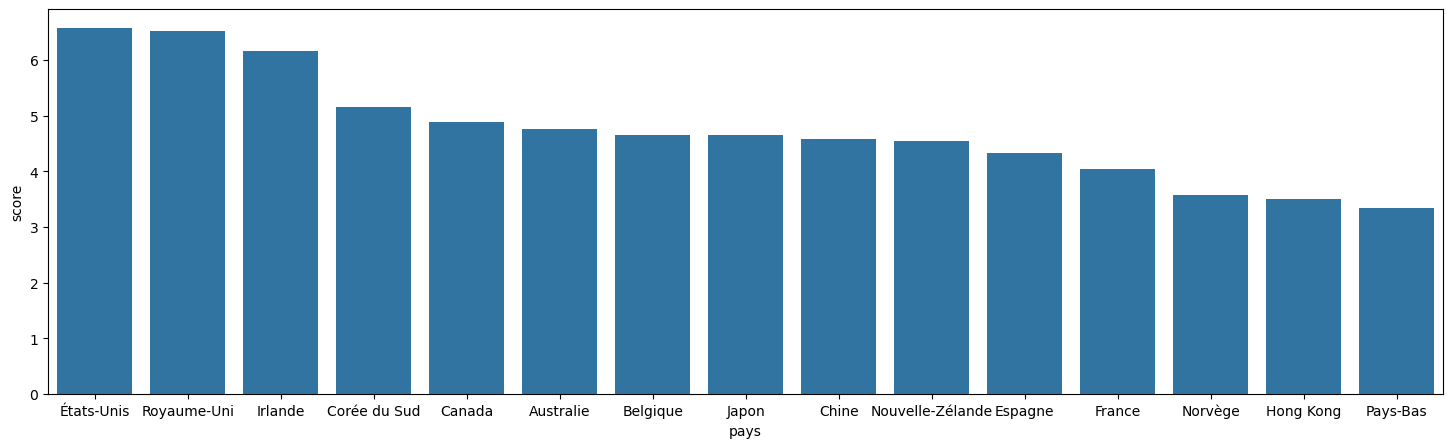

In [17]:
plt.figure(figsize=(18,5))

sns.barplot(data=df_top_pays, 
            x="pays", 
            y="score",
            errorbar=None)
plt.show()

## Réalisateurs qui ont le meilleur socre

C:\Users\Luna\AppData\Local\Temp\ipykernel_2040\1681182733.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top10_real_note,


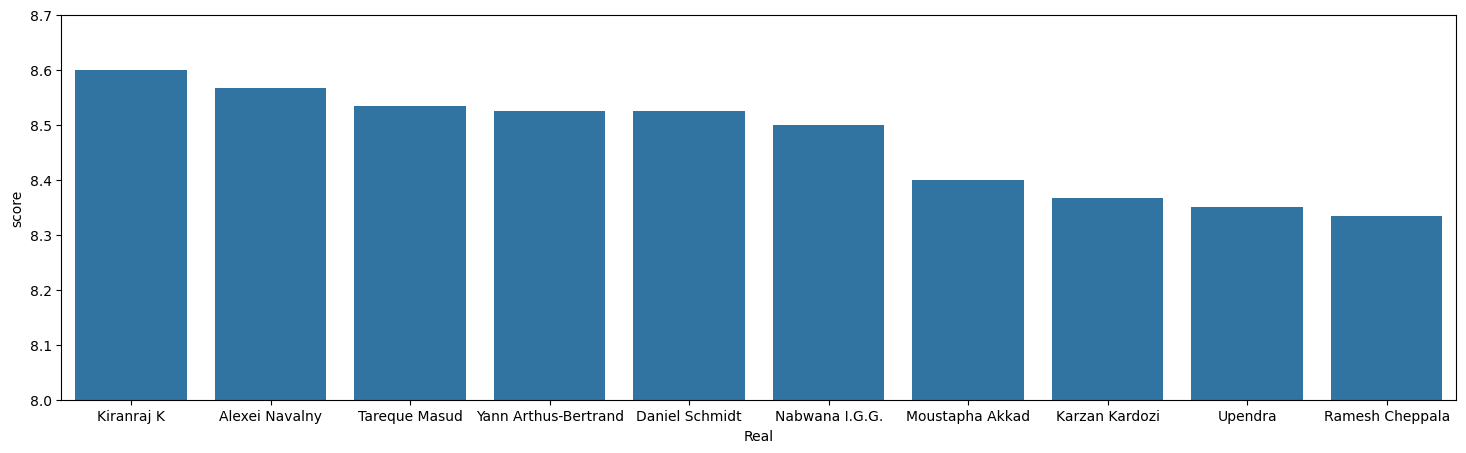

In [14]:
plt.figure(figsize=(18,5))

sns.barplot(data=df_top10_real_note, 
            x="Real", 
            y="score",
            ci = None,
            )
plt.ylim(8.0, 8.7)
plt.show()

## Réalisateurs qui ont le meilleur score ( avec pondération modif)

C:\Users\Luna\AppData\Local\Temp\ipykernel_2040\2078583279.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top10_real_note2,


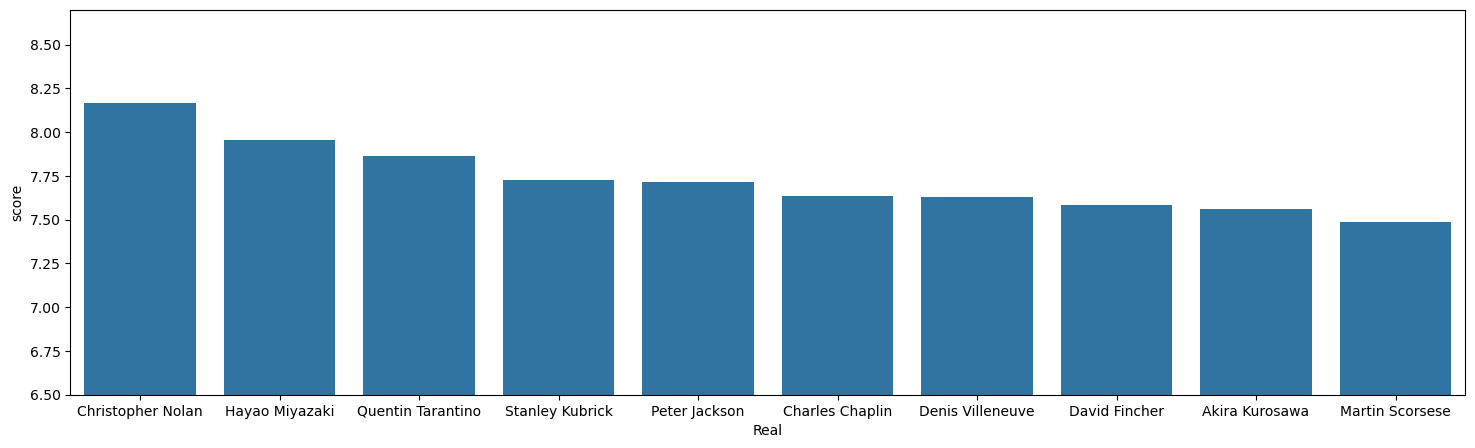

In [15]:
plt.figure(figsize=(18,5))

sns.barplot(data=df_top10_real_note2, 
            x="Real", 
            y="score",
            ci = None,
            )
plt.ylim(6.5, 8.7)
plt.show()

## Genre les plus représentés par décénie

Text(0.5, 1.0, 'Top 10 des genres par décénie')

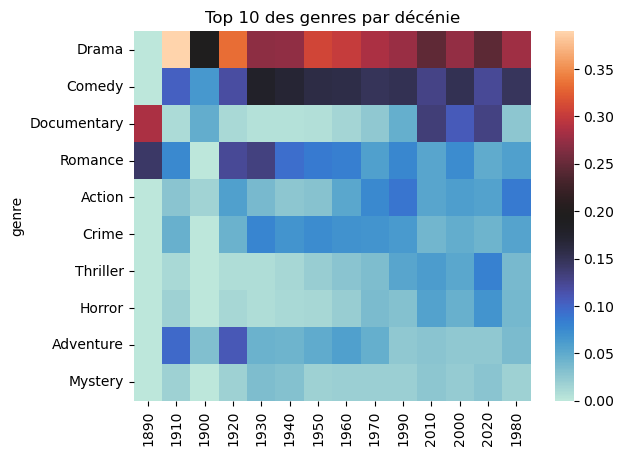

In [9]:
#df_top_genre = df_top_genre.drop(columns = "0")
sns.heatmap(df_top_genre, cmap = "icefire")
plt.title("Top 10 des genres par décénie")

## Evolution de la durée des films 

### Avec des boxplot

Text(0.5, 1.0, 'Evolution de la durée des films par décénie')

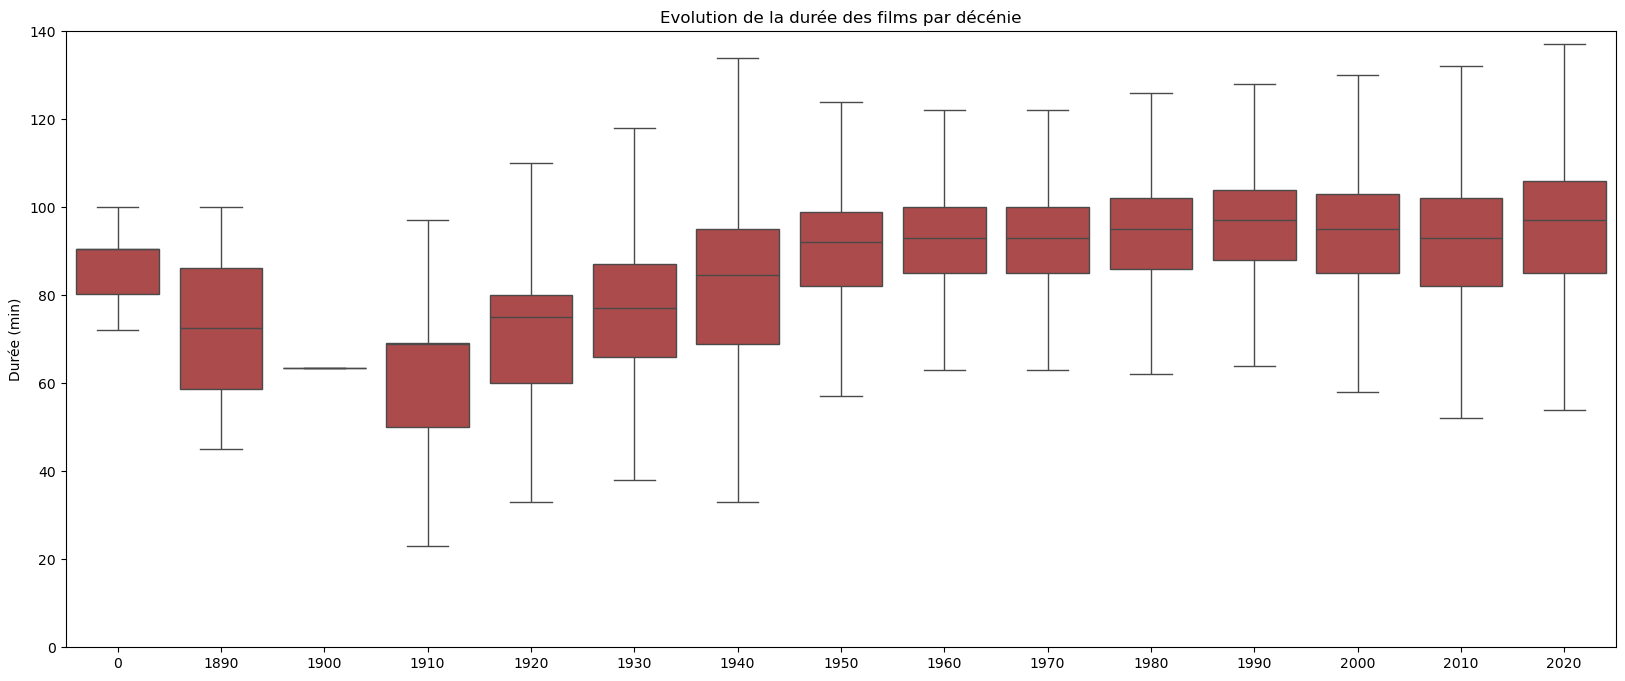

In [41]:
plt.figure(figsize = (20,8))
sns.boxplot(data=df_film, x="decenie", y="temps_minutes", showfliers=False, color = "#BC3B3B")
plt.ylim(0,140)
plt.ylabel("Durée (min)")
plt.xlabel("")
plt.title("Evolution de la durée des films par décénie")

### Avec un lineplot <3

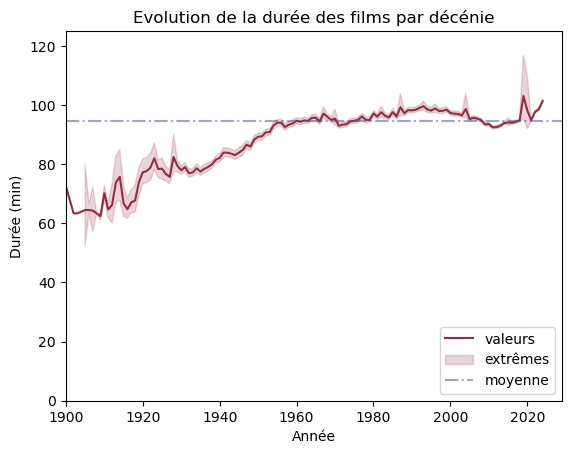

In [50]:
sns.lineplot(data = df_film, x = "année", y = "temps_minutes", color = "#922E44")
plt.xlim(1900, 2029)
plt.ylim(0,125)
moyenne = df_film['temps_minutes'].mean()
plt.axhline(moyenne, color='#494B9B', linestyle='-.', alpha = 0.5)
plt.ylabel("Durée (min)")
plt.xlabel("Année")
plt.title("Evolution de la durée des films par décénie")
plt.legend(["valeurs", "extrêmes", "moyenne"], loc = 'lower right')

### En scatter plot

Text(0.5, 1.0, 'Evolution de la durée des films par décénie')

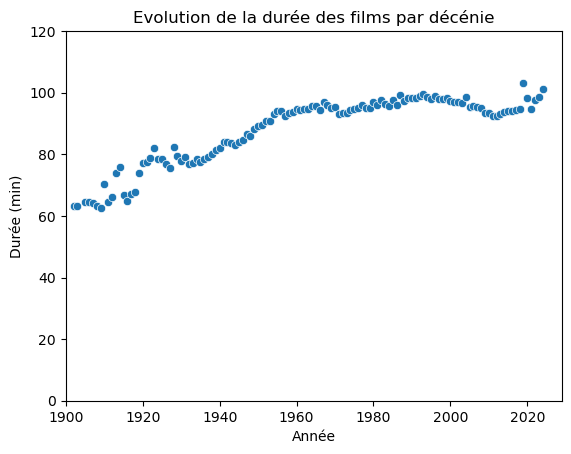

In [34]:
moyenne_annuelle =  df_film.groupby('année')['temps_minutes'].mean().reset_index()

sns.scatterplot(data = moyenne_annuelle, x = "année", y = "temps_minutes")
plt.xlim(1900, 2029)
plt.ylim(0,120)
plt.ylabel("Durée (min)")
plt.xlabel("Année")
plt.title("Evolution de la durée des films par décénie")

## Popularité (@Julien)

## Réalisateurs (@Julien)

# Données du CNC

### Selon la nationalité du film

Text(0.5, 1.0, 'Répartition des entrées selon la nationalité du film')

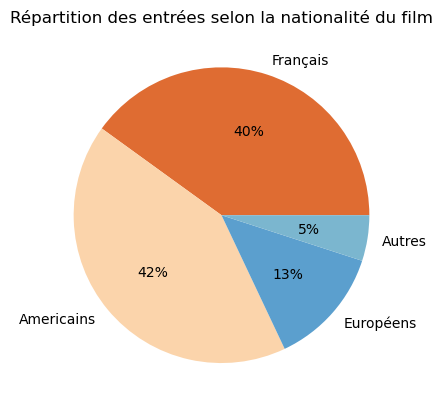

In [65]:
labels = 'Français', 'Americains', 'Européens', 'Autres'
sizes = [70.6, 74.1, 22.9, 8.8]

plt.pie(sizes, labels=labels, autopct = "%.0f%%", colors = ['#DF6C32', '#FBD4AB', '#5B9FCE', '#7BB6CF'])
plt.title("Répartition des entrées selon la nationalité du film")

### Selon le genre

Text(0.5, 1.0, 'Répartition des entrées selon le genre du film')

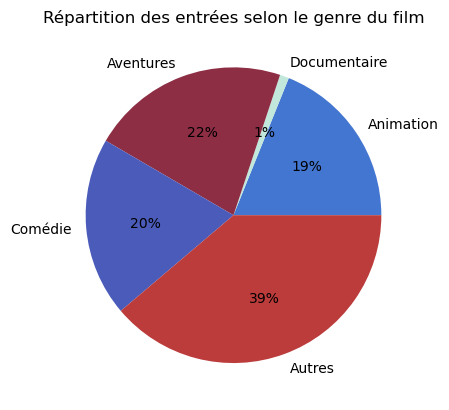

In [67]:
labels = 'Animation', 'Documentaire', 'Aventures', 'Comédie', 'Autres'
sizes = [18.9, 1, 21.7, 19.6, 38.8]

plt.pie(sizes, labels=labels, autopct = "%.0f%%", colors = ['#4376D0', '#C2E7DB', '#8D2E44', '#4A5BBA', '#BC3B3B'])
plt.title("Répartition des entrées selon le genre du film")

En conclusion: On va proposer principalement des films récents mais aussi les tops films de toutes les décénies (proportionnellement à leur 'éloignement' de notre décénie actuelle).

On pourrait quand-même faire un petit trie sur le nombre de vote (ex - 50 votes ?)

On peut supprimer les talk-show, les vidéos et garder des films proportionnellement à leur pays d'origine (prendre 40% de films français, 40% de films américains, 15% des meilleurs films européens et 8% parmis les meilleurs films du monde)

Une fois ça fait, réfléchir ua nombre de film que nous avons dans notre base de donnée (je pense qu'il faut quand même pas plus d'un milion de film (c'est déjà énorme, sans oublier tout de même qu'on adapte notre travail au client, client français donc bd adaptée )

In [ ]:
var = df_film.groupby("note_group")["popularity"].mean().reset_index()
sns.barplot(data = var, x = "note_group", y = "popularity")
plt.ylim(0,6)

# Réalisateurs ayant fait plus de 10 films

In [4]:
df = pd.read_csv("df_film_filtre.csv")

In [17]:
nb_films = df["Real"].value_counts()
nb_real = nb_films.value_counts().sort_index()
x = nb_real.index
y = nb_real.values

In [18]:
import plotly.express as px

In [19]:
fig = px.bar(x=x, y=y, 
             labels={'x': 'Nombre de films réalisés', 'y': 'Nombre de réalisateurs'})
fig.update_xaxes(range=[0, 10])
fig.show()

In [20]:
film_counts = df["Real"].value_counts()
df["Real"] = df["Real"].apply(lambda x: x if film_counts[x] > 10 else 'peu connu')
df

,Unnamed: 0,titre,année,temps_minutes,note,nb_votes,Real,popularity,poster_path,production_countries,genre
0,3,The Empress,1917,50.000000,5.1,26,peu connu,1.341,/5kqaWShpShGdE49DNEOgLESjVsQ.jpg,['US'],['Drama']
1,4,The Great Adventure,1918,50.000000,6.6,24,peu connu,0.840,/aPHkaRR2ggfYe6LqeQfSk0QRpgL.jpg,['US'],['Drama']
2,8,The Corbett-Fitzsimmons Fight,1897,100.000000,5.2,538,peu connu,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,['US'],"['Documentary', 'News', 'Sport']"
3,15,The Glorious Adventure,1922,70.000000,6.6,49,peu connu,0.841,/6letfzBJJUDxaBW7eZezjMLulrh.jpg,['GB'],"['Adventure', 'History']"
4,18,The Film Parade,1933,55.000000,7.2,46,peu connu,0.872,NaN,['GB'],['History']
...,...,...,...,...,...,...,...,...,...,...,...
107799,285297,Chubby Café,2019,94.787143,6.2,10,peu connu,0.883,/16DN1TFTV2qLbhaYlKZXG0juj4w.jpg,['CN'],"['Comedy', 'Crime', 'Drama']"
107800,285311,"2025: Blood, White & Blue",2022,135.000000,2.2,235,peu connu,3.534,/1S9pjiZejBiSVV88qU59ifZ7q0N.jpg,['US'],"['Action', 'Comedy', 'Horror']"
107801,285316,Rosa pietra stella,2020,94.000000,6.1,129,peu connu,1.218,/qrNd2Lp3u2ilHpQ5K27Z8HILMKG.jpg,['IT'],['Drama']
107802,285322,The Scrapper,2021,87.000000,4.3,1464,peu connu,3.510,/ydnOAvlBzdqMyBRBXyQpReSzxrH.jpg,['US'],"['Crime', 'Drama', 'Thriller']"


In [22]:
df.to_csv('df_less_real.csv')